3 arquivos estão sendo postados aqui: cadastro.csv; preço da gasolina.csv; salario_professioes.csv.
Diante desses 3 arquivos, o trabalho deve responder as seguintes perguntas:

Qual a idade média das pessoas no cadastro ?

Quantos homens tem no cadastro ?

Quantas mulheres tem no cadastro ?

Qual a idade média dos homens e das mulheres ?

Crie um gráfico de barras e mostre a distribuição de escolaridade no cadastro ?

Mostre a Média Salarial do cadastro ?

Quem tem o maior salário ?

Tirando desempregado quem recebe menos ?

Quantas pessoas gostam de caminhar no final de semana ?

Crie um gráfico mostrando entre a relação de escolaridade e quem pratica esporte ?

Crie um mapa de calor ?

Mostre de forma gráfica a distribuição de estados do cadastro ?


In [345]:
import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

%matplotlib inline

import collections

from collections import Counter

In [346]:
cadastro_df = pd.read_csv('cadastro - cadastro.csv')
precos_df = pd.read_csv('preco da gasolina - preco da gasolina.csv')
salario_df = pd.read_csv('salario_profissoes - salario_profissoes.csv')

In [347]:
print('Shape do dataframe cadastro',cadastro_df.shape)
print('Shape do dataframe preço',precos_df.shape)
print('Shape do dataframe salario', salario_df.shape)

Shape do dataframe cadastro (30, 15)
Shape do dataframe preço (19, 2)
Shape do dataframe salario (23, 3)


In [348]:
cadastro_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior


In [349]:
salario_df.head(3)

,Profissões,salario até 3 anos,salaior +3 anos
0,Cientista de Dados,10000,14000
1,dona de casa,1200,1200
2,desempregado,0,0


In [350]:
precos_df.head(3)

,cidade,preço
0,São Vicente,"3,45"
1,Santos,"3,33"
2,São Paulo,"3,23"


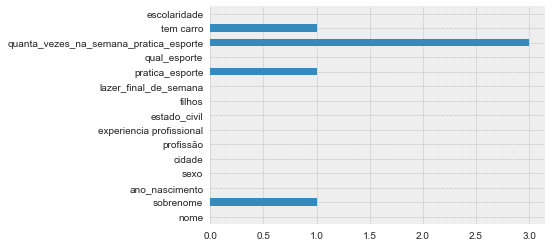

In [351]:
plt.style.use('bmh')
cadastro_df.isnull().sum().plot(kind='barh')

In [352]:
cadastro_df['Idade'] = 2020 - cadastro_df["ano_nascimento"]
media = round(sum(cadastro_df['Idade'])/len(cadastro_df['Idade']),0)
print('A idade média das pessoas cadastradas é',media)

A idade média das pessoas cadastradas é 33.0


{'m': 16, 'f': 14}


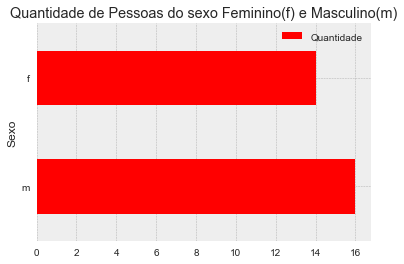

In [353]:
sexo_dict = dict(Counter(cadastro_df['sexo']))
sexo_df = pd.DataFrame(sexo_dict.items(), columns = ['Sexo','Quantidade'])
sexo_df.plot(kind='barh', x ='Sexo' , y = 'Quantidade', title = 'Quantidade de Pessoas do sexo Feminino(f) e Masculino(m)',color = 'red')
print(sexo_dict)

In [354]:
cadastro_f_df = cadastro_df.loc[(cadastro_df.sexo == 'f')]
media = round(sum(cadastro_f_df['Idade'])/len(cadastro_f_df['Idade']),0)
print('A idade média das pessoas cadastradas do sexo feminino é',media)

A idade média das pessoas cadastradas do sexo feminino é 34.0


In [355]:
cadastro_m_df = cadastro_df.loc[(cadastro_df.sexo == 'm')]
media = round(sum(cadastro_m_df['Idade'])/len(cadastro_m_df['Idade']),0)
print('A idade média das pessoas cadastradas do sexo masculino é',media)

A idade média das pessoas cadastradas do sexo masculino é 32.0


In [356]:
cadastro_df['escolaridade'].unique()

array(['Ensino Superior', 'Ensino Médio', 'Ensimo Tecnico',
       'ensino médio', 'ensino superior', 'ensino Médio'], dtype=object)

{'Ensino Superior': 21, 'Ensino Médio': 8, 'Ensino Tecnico': 1}


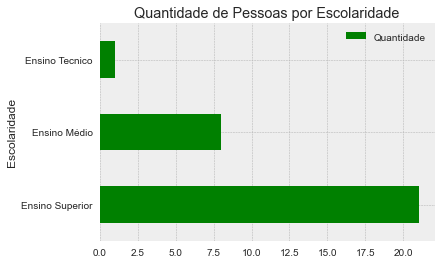

In [357]:
cadastro_df = cadastro_df.replace('Ensimo Tecnico', 'Ensino Tecnico')
cadastro_df = cadastro_df.replace('ensino médio', 'Ensino Médio')
cadastro_df = cadastro_df.replace('ensino Médio', 'Ensino Médio')
cadastro_df = cadastro_df.replace('ensino superior', 'Ensino Superior')
cadastro_df['escolaridade'].unique()
escolaridade_dict = dict(Counter(cadastro_df['escolaridade']))
escolaridade_df = pd.DataFrame(escolaridade_dict.items(), columns = ['Escolaridade','Quantidade'])
escolaridade_df.plot(kind='barh', x ='Escolaridade' , y = 'Quantidade', title = 'Quantidade de Pessoas por Escolaridade',color = 'green')
print(escolaridade_dict)

In [358]:
cadastro_salario_df = cadastro_df.merge(salario_df, left_on='profissão', right_on='Profissões')
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,salario até 3 anos,salaior +3 anos
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,10000,14000
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200,1200
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0,0


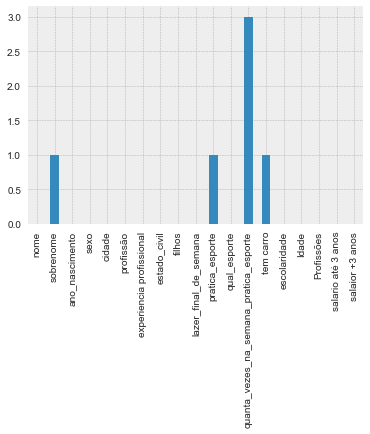

In [359]:
cadastro_salario_df.isnull().sum().plot(kind='bar')

In [360]:
for index, row in cadastro_salario_df.iterrows():
    if row['experiencia profissional'] <= 3:
        cadastro_salario_df.loc[index,'Salario_Atual'] =  int(cadastro_salario_df.loc[index,'salario até 3 anos'])
    else:
        cadastro_salario_df.loc[index,'Salario_Atual'] =  int(cadastro_salario_df.loc[index,'salaior +3 anos'])

cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,profissão,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,salario até 3 anos,salaior +3 anos,Salario_Atual
0,Dirceu,Manolo,1985,m,São Vicente,Cientista de Dados,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,10000,14000,14000.0
1,Maria,Silva,1970,f,Santos,dona de casa,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200,1200,1200.0
2,Adalberto,Martins,1990,m,São Paulo,desempregado,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0,0,0.0


In [361]:
cadastro_salario_df = cadastro_salario_df.drop('profissão', axis = 1)
cadastro_salario_df = cadastro_salario_df.drop('salario até 3 anos', axis = 1)
cadastro_salario_df = cadastro_salario_df.drop('salaior +3 anos', axis = 1)
cadastro_salario_df.head(3)

,nome,sobrenome,ano_nascimento,sexo,cidade,experiencia profissional,estado_civil,filhos,lazer_final_de_semana,pratica_esporte,qual_esporte,quanta_vezes_na_semana_pratica_esporte,tem carro,escolaridade,Idade,Profissões,Salario_Atual
0,Dirceu,Manolo,1985,m,São Vicente,4,Casado,1,"estudar, academia, jogar video game,surfar",sim,academia,3.0,sim,Ensino Superior,35,Cientista de Dados,14000.0
1,Maria,Silva,1970,f,Santos,2,Casada,3,ver tv,não,-,0.0,não,Ensino Médio,50,dona de casa,1200.0
2,Adalberto,Martins,1990,m,São Paulo,0,Solteiro,1,jogar bola,sim,jogo bola,2.0,sim,Ensino Superior,30,desempregado,0.0


In [362]:
media = round(cadastro_salario_df['Salario_Atual'].mean())
print("A média dos salarios é",media)

A média dos salarios é 4617


In [363]:
maior_df = cadastro_salario_df.loc[(cadastro_salario_df.Salario_Atual == round(max(cadastro_salario_df['Salario_Atual']))),['Salario_Atual', 'Profissões']]
print("O maior salario \n",maior_df)

O maior salario 
    Salario_Atual Profissões
9        20000.0     Médica


In [364]:
menor_df = cadastro_salario_df.loc[(cadastro_salario_df.Profissões != 'desempregado') & (cadastro_salario_df.Salario_Atual == round(min(menor_df['Salario_Atual']))),["Profissões","Salario_Atual"]]
print("O menor salario é \n",menor_df)

O menor salario é 
    Profissões  Salario_Atual
10  estudante            0.0
11  estudante            0.0


In [365]:
cadastro_dict = dict(Counter(cadastro_salario_df.lazer_final_de_semana.str.contains('caminhar')))
cadastro_dict['Sim'] = cadastro_dict.pop(True)
cadastro_dict['Não'] = cadastro_dict.pop(False)
df_caminhar = pd.DataFrame(cadastro_dict.items(), columns = ['caminha','Quantidade'])
df_caminhar

,caminha,Quantidade
0,Sim,3
1,Não,26


In [387]:
for index, row in cadastro_salario_df.iterrows():
    if row['pratica_esporte'] != "nan":
        cadastro_salario_df.loc[index,'pratica_esporte'] =  str(cadastro_salario_df.loc[index,'pratica_esporte'])
    elif row['qual_esporte'] == '-':
        cadastro_salario_df.loc[index,'pratica_esporte'] =  ('não')

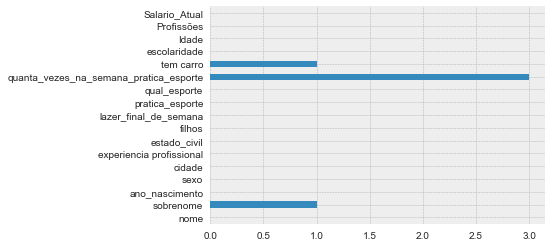

In [388]:
cadastro_salario_df.isnull().sum().plot(kind='barh')

In [389]:
cadastro_salario_df['pratica_esporte'].unique()

array(['sim', 'não'], dtype=object)